In [1]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np
import comparison as cmp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch as patch
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; 
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pycwt as wavelet; mother = wavelet.Morlet(6)
from scipy import stats
import read_data as rd;   import time2frequency as t2f
import behavior_track as bt ; import behavior_plot as bp ; import turning_track  as tt
import philters
fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;
N = int((1/fps)/T/2+1);

sgn   = ['***','**','*']
P_sgn = np.array([0.0001, 0.001, 0.05])

D:\Dropbox\Lab\MotorCortex\Multi_Rats_ver2.0
D:\Dropbox\Lab\MotorCortex


In [2]:
rats = '_post'
# rats=''
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy');
mode = 'FFT'
f = np.load('Rats/freqs_'+mode+'_'+str(fs_out)+'.npy');x_fit = np.log10(f); 

idx_f1_fit = np.logical_and(f>=16.25, f<=18.75);
idx_f2_fit = np.logical_and(f>=45.00, f<=57.50); idx_f_fit = np.logical_or(idx_f1_fit, idx_f2_fit);
idx_f_fit = np.logical_or(idx_f1_fit, idx_f2_fit);
for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    print(rfdn[9:len(rfdn)-1], len(epn))
#     slope_l, intercept_l, slope_i, intercept_i, intercept_li = \
#     t2f.flicker_fit_fft(rfdn, epn, fs_out, subset, f, idx_f_fit, mode)
#     slope     = np.array([slope_l,     slope_i]);
#     intercept = np.array([intercept_l, intercept_i]);

#     np.save(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy',    slope)
#     np.save(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy',intercept)

Swashbuckler 13
Outlaw 42
Drifter 27
Quartus 15
Lenny 6


In [7]:
T_pre = 0
sgn   = ['***','**','*']
P_sgn = np.array([0.0001, 0.001, 0.05])
T1 = np.load('Rats/T1.npy');
T2 = np.load('Rats/T2.npy');
print('T1:', T1, 'T2:', T2)
idx_t_beta_1 = np.arange(T_pre+15, T_pre+60).astype('int');
idx_t_beta_2 = np.arange(T_pre+60, T_pre+105).astype('int');
idx_t_beta_3 = np.arange(T_pre+T2-45, T_pre+T2).astype('int');
idx_f_beta_l = np.logical_and(f>=18.75, f<=28.75);
idx_f_beta_h = np.logical_and(f>=35,    f<=45);
f_beta_l = f[idx_f_beta_l];
f_beta_h = f[idx_f_beta_h];

T1: 120 T2: 150


In [3]:
# rats = ''
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(8); fig.set_figwidth(15)
gs  = GridSpec(2, 6);
n_acc_total_x = 0
xtk    = np.arange(1, 5*n_r+1, 5)
xticklabel = [];
y_tf_Bl1 = np.empty((0,));   y_tf_Bh1 = np.empty((0,))
y_tf_Bl2 = np.empty((0,));   y_tf_Bh2 = np.empty((0,))
y_tf_Bl3 = np.empty((0,));   y_tf_Bh3 = np.empty((0,))
rr = 0

rt_pre = np.empty((0,))
for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')
    
    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    
    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)

    y_tf_i_Bl1 = np.empty((0,));  y_tf_i_Bh1 = np.empty((0,))
    y_tf_i_Bl2 = np.empty((0,));  y_tf_i_Bh2 = np.empty((0,))
    y_tf_i_Bl3 = np.empty((0,));  y_tf_i_Bh3 = np.empty((0,))
    n_acc_total = 0
    
    
    
    kk = 0
    for k in epn:
        fdn = rfdn + k + '/'
        spd_f   = np.load(fdn+'tracking/'+'spd_f.npy');
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        idx_pre_acc   = np.load(fdn+'tracking/'+'idx_pre_acc.npy')

        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);Y_fit = (Y_f/y_fit)
        Y_f_fit_i_bl = Y_fit[:,idx_f_beta_l]
        Y_f_fit_i_bh = Y_fit[:,idx_f_beta_h]
        
        
        
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f   = np.load(fdn+'tracking/T_acc_f.npy');
        
        n_acc       = len(idx_acc_f)
        rt_pre = np.append(rt_pre, n_acc/T_ts)
        
        n_acc_total = n_acc_total+n_acc
        idx_pre_ac = np.zeros((l_t,))>1;
        if n_acc>0:
            for i in np.arange(len(idx_acc_f)):
                T_ref = T_acc_f[i]
                t_ref = idx_acc_f[i]+int(T_ref)
                idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
                idx_pre_ac[idx_t_spec] = True
                
                Y_acc_i = Y_f_fit_i_bl[idx_t_spec,:]
                y_tf_i_Bl1 = np.append(y_tf_i_Bl1, np.mean(Y_acc_i[idx_t_beta_1,:]))
                y_tf_i_Bl2 = np.append(y_tf_i_Bl2, np.mean(Y_acc_i[idx_t_beta_2,:]))
                y_tf_i_Bl3 = np.append(y_tf_i_Bl3, np.mean(Y_acc_i[idx_t_beta_3,:]))
                
                Y_acc_i = Y_f_fit_i_bh[idx_t_spec,:]
                y_tf_i_Bh1 = np.append(y_tf_i_Bh1, np.mean(Y_acc_i[idx_t_beta_1,:]))
                y_tf_i_Bh2 = np.append(y_tf_i_Bh2, np.mean(Y_acc_i[idx_t_beta_2,:]))
                y_tf_i_Bh3 = np.append(y_tf_i_Bh3, np.mean(Y_acc_i[idx_t_beta_3,:]))
                
            idx_pre_ac = np.logical_and(idx_pre_ac, idx_clean)
        kk += 1
        
    n_acc_total_x = n_acc_total_x+n_acc_total 
    
    y_tf_i_Bl1_m = np.mean(y_tf_i_Bl1); y_tf_i_Bl1_s = np.std(y_tf_i_Bl1)
    y_tf_i_Bl2_m = np.mean(y_tf_i_Bl2); y_tf_i_Bl2_s = np.std(y_tf_i_Bl2)
    y_tf_i_Bl3_m = np.mean(y_tf_i_Bl3); y_tf_i_Bl3_s = np.std(y_tf_i_Bl3)
    
    y_tf_i_Bh1_m = np.mean(y_tf_i_Bh1); y_tf_i_Bh1_s = np.std(y_tf_i_Bh1)
    y_tf_i_Bh2_m = np.mean(y_tf_i_Bh2); y_tf_i_Bh2_s = np.std(y_tf_i_Bh2)
    y_tf_i_Bh3_m = np.mean(y_tf_i_Bh3); y_tf_i_Bh3_s = np.std(y_tf_i_Bh3)
    
    y_tf_Bl1 = np.append(y_tf_Bl1, y_tf_i_Bl1); y_tf_Bh1 = np.append(y_tf_Bh1, y_tf_i_Bh1);
    y_tf_Bl2 = np.append(y_tf_Bl2, y_tf_i_Bl2); y_tf_Bh2 = np.append(y_tf_Bh2, y_tf_i_Bh2);
    y_tf_Bl3 = np.append(y_tf_Bl3, y_tf_i_Bl3); y_tf_Bh3 = np.append(y_tf_Bh3, y_tf_i_Bh3);
    
    t, p_l  = stats.ttest_rel(y_tf_i_Bl1,   y_tf_i_Bl2); print('low beta:',np.round(p_l,15))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax_idx = gs[0, 0:4]; ax = fig.add_subplot(ax_idx);
    
    ax.bar(xtk[rr]-0.75, y_tf_i_Bl1_m,   width = 0.45,
           capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.75, y_tf_i_Bl1_m,  y_tf_i_Bl1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    ax.bar(xtk[rr]+0.0, y_tf_i_Bl2_m,    width = 0.45,
           capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
    ax.errorbar(xtk[rr]+0.0,  y_tf_i_Bl2_m,  y_tf_i_Bl2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    ax.bar(xtk[rr]+0.75, y_tf_i_Bl3_m,   width = 0.45,
           capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
    ax.errorbar(xtk[rr]+0.75, y_tf_i_Bl3_m,  y_tf_i_Bl3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    h_l = y_tf_i_Bl1_m + y_tf_i_Bl1_s;  h_i = y_tf_i_Bl2_m + y_tf_i_Bl2_s;  h = np.max([h_l,h_i])*1.05
    
    ax.plot([xtk[rr]-0.75, xtk[rr]-0.75, xtk[rr]+0.0, xtk[rr]+0.0], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-0.75, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')
    
    t, p_l  = stats.ttest_rel(y_tf_i_Bh1,   y_tf_i_Bh2); print('high beta:',np.round(p_l,15))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    
    ax_idx = gs[1, 0:4]; ax = fig.add_subplot(ax_idx);
    
    ax.bar(xtk[rr]-0.75, y_tf_i_Bh1_m,   width = 0.45,
           capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.75, y_tf_i_Bh1_m,  y_tf_i_Bh1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    ax.bar(xtk[rr]+0.0,  y_tf_i_Bh2_m,    width = 0.45,
           capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
    ax.errorbar(xtk[rr]+0.0,  y_tf_i_Bh2_m,  y_tf_i_Bh2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    ax.bar(xtk[rr]+0.75, y_tf_i_Bh3_m,   width = 0.45,
           capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
    ax.errorbar(xtk[rr]+0.75, y_tf_i_Bh3_m,  y_tf_i_Bh3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
    h_l = y_tf_i_Bh1_m + y_tf_i_Bh1_s;  h_i = y_tf_i_Bh2_m + y_tf_i_Bh2_s;  h = np.max([h_l,h_i])*1.05
    
    ax.plot([xtk[rr]-0.75, xtk[rr]-0.75, xtk[rr]+0.0, xtk[rr]+0.0], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-0.75, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')
    
    rr += 1
    

ax_idx = gs[0, 0:4]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.0]);
ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('low beta band:'+str(f_beta_l[0])+' hz to '+str(f_beta_l[-1])+ ' hz')


ax_idx = gs[1, 0:4]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.0])
ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('high beta band:'+str(f_beta_h[0])+' hz to '+str(f_beta_h[-1])+ ' hz')

xtk = np.array([-0.75,0,0.75])
# t, p_l   = stats.ttest_ind(y_tf_Bl1, y_tf_Bl2,  equal_var=False)
t, p_l  = stats.ttest_rel(y_tf_Bl1,   y_tf_Bl2);
print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
y_tf_Bl1_m = np.mean(y_tf_Bl1); y_tf_Bl1_s = np.std(y_tf_Bl1)
y_tf_Bl2_m = np.mean(y_tf_Bl2); y_tf_Bl2_s = np.std(y_tf_Bl2)
y_tf_Bl3_m = np.mean(y_tf_Bl3); y_tf_Bl3_s = np.std(y_tf_Bl3)
ax_idx = gs[0, 5]; ax = fig.add_subplot(ax_idx);
ax.bar(xtk[0], y_tf_Bl1_m,   width = 0.45,
       capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[0], y_tf_Bl1_m,  y_tf_Bl1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[1],  y_tf_Bl2_m,    width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
ax.errorbar(xtk[1], y_tf_Bl2_m,  y_tf_Bl2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[2], y_tf_Bl3_m,   width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
ax.errorbar(xtk[2], y_tf_Bl3_m,  y_tf_Bl3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

h_l = y_tf_Bl1_m + y_tf_Bl1_s;  h_i = y_tf_Bl2_m + y_tf_Bl2_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[0], xtk[0], xtk[1], xtk[1]], [h+0.01, h+0.03, h+0.03, h+0.01], 'k', lw=1.5)
ax.text(xtk[0], h+0.1,  sign_l+'\n n = '+str(n_acc_total_x), fontsize=10, color = 'k')
# ax.set_xticklabels(xticklabel, fontsize=10);
ax.set_xticks(xtk); ax.set_ylim([0.5,2.0])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('all the animals')

# t, p_l  = stats.ttest_ind(y_tf_Bh1, y_tf_Bh2,  equal_var=False)
t, p_l  = stats.ttest_rel(y_tf_Bh1,   y_tf_Bh2);
print('high beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
y_tf_Bh1_m = np.mean(y_tf_Bh1); y_tf_Bh1_s = np.std(y_tf_Bh1)
y_tf_Bh2_m = np.mean(y_tf_Bh2); y_tf_Bh2_s = np.std(y_tf_Bh2)
y_tf_Bh3_m = np.mean(y_tf_Bh3); y_tf_Bh3_s = np.std(y_tf_Bh3)
ax_idx = gs[1, 5]; ax = fig.add_subplot(ax_idx);
ax.bar(xtk[0], y_tf_Bh1_m,   width = 0.45,
       capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[0], y_tf_Bh1_m,  y_tf_Bh1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[1],  y_tf_Bh2_m,    width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
ax.errorbar(xtk[1], y_tf_Bh2_m,  y_tf_Bh2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[2], y_tf_Bh3_m,   width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
ax.errorbar(xtk[2], y_tf_Bh3_m,  y_tf_Bh3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

h_l = y_tf_Bh1_m + y_tf_Bh1_s;  h_i = y_tf_Bh2_m + y_tf_Bh2_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[0], xtk[0], xtk[1], xtk[1]], [h+0.01, h+0.03, h+0.03, h+0.01], 'k', lw=1.5)
ax.text(xtk[0], h+0.1,  sign_l+'\n n = '+str(n_acc_total_x), fontsize=10, color = 'k')
# ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.0])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('all the animals')



fig.suptitle('average Beta burst rate in lesion and intact side of motor cortex'+
             '\n paired t-test *:p<0.05, **:p<0.001, ***:p<0.0001', fontsize=10)

_post
Swashbuckler 13


NameError: name 'idx_f_beta_l' is not defined

<Figure size 1080x576 with 0 Axes>

# Lesion

In [33]:
erfdn = np.load('Rats/Rats_ephy_post.npy')
mode = 'FFT'
f = np.load('Rats/freqs_'+mode+'_'+str(fs_out)+'.npy');x_fit = np.log10(f); 


idx_f1_fit = np.logical_and(f>=12.50, f<=15.00);
idx_f2_fit = np.logical_and(f>=48.75, f<=57.50); idx_f_fit = np.logical_or(idx_f1_fit, idx_f2_fit);
for rfdn in erfdn:
    
    epn    = np.load(rfdn+'tracking'+'/epn_ephy_post.npy')
    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    print(rfdn[9:len(rfdn)-1], len(epn))
    slope_l, intercept_l, slope_i, intercept_i, intercept_li = \
    t2f.flicker_fit_fft(rfdn, epn, fs_out, subset, f, idx_f_fit, mode)
    slope     = np.array([slope_l,     slope_i]);
    intercept = np.array([intercept_l, intercept_i]);

    np.save(rfdn+'tracking'+'/slope_epn_ephy_post.npy',    slope)
    np.save(rfdn+'tracking'+'/intercept_epn_ephy_post.npy',intercept)

Swashbuckler 15
Outlaw 40
Quartus 17
Unknown 9
Drifter 17
Lenny 6
Astro 17


Swashbuckler 15
Outlaw 40
Quartus 15
Unknown 9
Drifter 17
Lenny 6
Astro 17
low beta: 0.0
high beta: 1.8867445969e-05


Text(0.5,0.98,'average Beta burst rate in lesion and intact side of motor cortex\n paired t-test *:p<0.05, **:p<0.001, ***:p<0.0001')

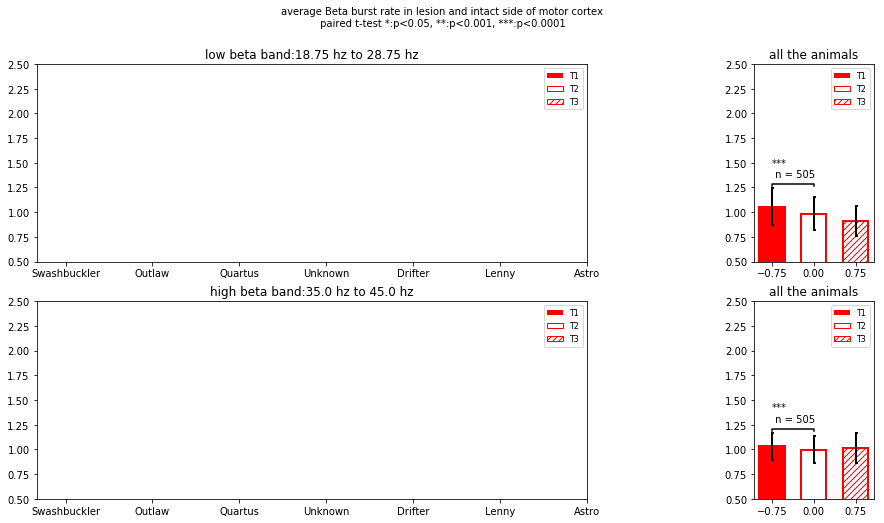

In [5]:
erfdn = np.load('Rats/Rats_ephy_post.npy')#[[0,3,4,5]]; 
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(8); fig.set_figwidth(15)
gs  = GridSpec(2, 6);
n_acc_total_x = 0
xtk    = np.arange(1, 3*n_r+1, 3)
xticklabel = [];
y_tf_Bl1 = np.empty((0,));   y_tf_Bh1 = np.empty((0,))
y_tf_Bl2 = np.empty((0,));   y_tf_Bh2 = np.empty((0,))
y_tf_Bl3 = np.empty((0,));   y_tf_Bh3 = np.empty((0,))
rt_post = np.empty((0,))
rr = 0
for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy_post.npy')
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy_post.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy_post.npy')
    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    
    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)

    y_tf_i_Bl1 = np.empty((0,));  y_tf_i_Bh1 = np.empty((0,))
    y_tf_i_Bl2 = np.empty((0,));  y_tf_i_Bh2 = np.empty((0,))
    y_tf_i_Bl3 = np.empty((0,));  y_tf_i_Bh3 = np.empty((0,))
    n_acc_total = 0
    kk = 0
    for k in epn:
        fdn = rfdn + k + '/'
        spd_f   = np.load(fdn+'tracking/'+'spd_f.npy');
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        idx_pre_acc   = np.load(fdn+'tracking/'+'idx_pre_acc.npy')

        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);Y_fit = (Y_f/y_fit)
        Y_fit_m = np.mean(Y_fit[idx_pre_acc,:],axis=0);Y_fit = Y_fit/Y_fit_m
        Y_f_fit_i_bl = Y_fit[:,idx_f_beta_l]
        Y_f_fit_i_bh = Y_fit[:,idx_f_beta_h]
        
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f   = np.load(fdn+'tracking/T_acc_f.npy');
        
        n_acc       = len(idx_acc_f)
        
        rt_post = np.append(rt_post, n_acc/T_ts)
        
        n_acc_total = n_acc_total+n_acc
        idx_pre_ac = np.zeros((l_t,))>1;
        if n_acc>0:
            for i in np.arange(len(idx_acc_f)):
                T_ref = T_acc_f[i]
                t_ref = idx_acc_f[i]+int(T_ref)
                idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
                idx_pre_ac[idx_t_spec] = True
                
                Y_acc_i = Y_f_fit_i_bl[idx_t_spec,:]
                y_tf_i_Bl1 = np.append(y_tf_i_Bl1, np.mean(Y_acc_i[idx_t_beta_1,:]))
                y_tf_i_Bl2 = np.append(y_tf_i_Bl2, np.mean(Y_acc_i[idx_t_beta_2,:]))
                y_tf_i_Bl3 = np.append(y_tf_i_Bl3, np.mean(Y_acc_i[idx_t_beta_3,:]))
                
                Y_acc_i = Y_f_fit_i_bh[idx_t_spec,:]
                y_tf_i_Bh1 = np.append(y_tf_i_Bh1, np.mean(Y_acc_i[idx_t_beta_1,:]))
                y_tf_i_Bh2 = np.append(y_tf_i_Bh2, np.mean(Y_acc_i[idx_t_beta_2,:]))
                y_tf_i_Bh3 = np.append(y_tf_i_Bh3, np.mean(Y_acc_i[idx_t_beta_3,:]))
                
            idx_pre_ac = np.logical_and(idx_pre_ac, idx_clean)
        kk += 1
        
    n_acc_total_x = n_acc_total_x+n_acc_total 
    
    y_tf_i_Bl1_m = np.mean(y_tf_i_Bl1); y_tf_i_Bl1_s = np.std(y_tf_i_Bl1)
    y_tf_i_Bl2_m = np.mean(y_tf_i_Bl2); y_tf_i_Bl2_s = np.std(y_tf_i_Bl2)
    y_tf_i_Bl3_m = np.mean(y_tf_i_Bl3); y_tf_i_Bl3_s = np.std(y_tf_i_Bl3)
    
    y_tf_i_Bh1_m = np.mean(y_tf_i_Bh1); y_tf_i_Bh1_s = np.std(y_tf_i_Bh1)
    y_tf_i_Bh2_m = np.mean(y_tf_i_Bh2); y_tf_i_Bh2_s = np.std(y_tf_i_Bh2)
    y_tf_i_Bh3_m = np.mean(y_tf_i_Bh3); y_tf_i_Bh3_s = np.std(y_tf_i_Bh3)
    
    y_tf_Bl1 = np.append(y_tf_Bl1, y_tf_i_Bl1); y_tf_Bh1 = np.append(y_tf_Bh1, y_tf_i_Bh1);
    y_tf_Bl2 = np.append(y_tf_Bl2, y_tf_i_Bl2); y_tf_Bh2 = np.append(y_tf_Bh2, y_tf_i_Bh2);
    y_tf_Bl3 = np.append(y_tf_Bl3, y_tf_i_Bl3); y_tf_Bh3 = np.append(y_tf_Bh3, y_tf_i_Bh3);
    
#     t, p_l  = stats.ttest_rel(y_tf_i_Bl1,   y_tf_i_Bl2); print('low beta:',np.round(p_l,15))
#     i = 0
#     sign_l = ''
#     while i < 3:
#         if p_l<P_sgn[i]: sign_l = sgn[i]; break
#         else: i = i+1

#     ax_idx = gs[0, 0:4]; ax = fig.add_subplot(ax_idx);
    
#     ax.bar(xtk[rr]-0.75, y_tf_i_Bl1_m,   width = 0.45,
#            capsize=2, lw = 2, color='red', edgecolor = 'red')
#     ax.errorbar(xtk[rr]-0.75, y_tf_i_Bl1_m,  y_tf_i_Bl1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     ax.bar(xtk[rr]+0.0, y_tf_i_Bl2_m,    width = 0.45,
#            capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
#     ax.errorbar(xtk[rr]+0.0,  y_tf_i_Bl2_m,  y_tf_i_Bl2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     ax.bar(xtk[rr]+0.75, y_tf_i_Bl3_m,   width = 0.45,
#            capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
#     ax.errorbar(xtk[rr]+0.75, y_tf_i_Bl3_m,  y_tf_i_Bl3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     h_l = y_tf_i_Bl1_m + y_tf_i_Bl1_s;  h_i = y_tf_i_Bl2_m + y_tf_i_Bl2_s;  h = np.max([h_l,h_i])*1.01
    
#     ax.plot([xtk[rr]-0.75, xtk[rr]-0.75, xtk[rr]+0.0, xtk[rr]+0.0], 
#             [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
#     ax.text(xtk[rr]-0.75, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')
    
#     t, p_l  = stats.ttest_rel(y_tf_i_Bh1,   y_tf_i_Bh2); print('high beta:',np.round(p_l,15))
#     i = 0
#     sign_l = ''
#     while i < 3:
#         if p_l<P_sgn[i]: sign_l = sgn[i]; break
#         else: i = i+1
    
#     ax_idx = gs[1, 0:4]; ax = fig.add_subplot(ax_idx);
    
#     ax.bar(xtk[rr]-0.75, y_tf_i_Bh1_m,   width = 0.45,
#            capsize=2, lw = 2, color='red', edgecolor = 'red')
#     ax.errorbar(xtk[rr]-0.75, y_tf_i_Bh1_m,  y_tf_i_Bh1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     ax.bar(xtk[rr]+0.0,  y_tf_i_Bh2_m,    width = 0.45,
#            capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
#     ax.errorbar(xtk[rr]+0.0,  y_tf_i_Bh2_m,  y_tf_i_Bh2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     ax.bar(xtk[rr]+0.75, y_tf_i_Bh3_m,   width = 0.45,
#            capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
#     ax.errorbar(xtk[rr]+0.75, y_tf_i_Bh3_m,  y_tf_i_Bh3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')
    
#     h_l = y_tf_i_Bh1_m + y_tf_i_Bh1_s;  h_i = y_tf_i_Bh2_m + y_tf_i_Bh2_s;  h = np.max([h_l,h_i])*1.01
    
#     ax.plot([xtk[rr]-0.75, xtk[rr]-0.75, xtk[rr]+0.0, xtk[rr]+0.0], 
#             [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
#     ax.text(xtk[rr]-0.75, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')
    
    rr += 1
    

ax_idx = gs[0, 0:4]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.5])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('low beta band:'+str(f_beta_l[0])+' hz to '+str(f_beta_l[-1])+ ' hz')


ax_idx = gs[1, 0:4]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.5])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('high beta band:'+str(f_beta_h[0])+' hz to '+str(f_beta_h[-1])+ ' hz')

xtk = np.array([-0.75,0,0.75])
# t, p_l   = stats.ttest_ind(y_tf_Bl1, y_tf_Bl2,  equal_var=False)
t, p_l  = stats.ttest_rel(y_tf_Bl1,   y_tf_Bl2);
print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
y_tf_Bl1_m = np.mean(y_tf_Bl1); y_tf_Bl1_s = np.std(y_tf_Bl1)
y_tf_Bl2_m = np.mean(y_tf_Bl2); y_tf_Bl2_s = np.std(y_tf_Bl2)
y_tf_Bl3_m = np.mean(y_tf_Bl3); y_tf_Bl3_s = np.std(y_tf_Bl3)
ax_idx = gs[0, 5]; ax = fig.add_subplot(ax_idx);
ax.bar(xtk[0], y_tf_Bl1_m,   width = 0.45,
       capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[0], y_tf_Bl1_m,  y_tf_Bl1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[1],  y_tf_Bl2_m,    width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
ax.errorbar(xtk[1], y_tf_Bl2_m,  y_tf_Bl2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[2], y_tf_Bl3_m,   width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
ax.errorbar(xtk[2], y_tf_Bl3_m,  y_tf_Bl3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

h_l = y_tf_Bl1_m + y_tf_Bl1_s;  h_i = y_tf_Bl2_m + y_tf_Bl2_s;  h = np.max([h_l,h_i])*1.01

ax.plot([xtk[0], xtk[0], xtk[1], xtk[1]], [h+0.01, h+0.03, h+0.03, h+0.01], 'k', lw=1.5)
ax.text(xtk[0], h+0.1,  sign_l+'\n n = '+str(n_acc_total_x), fontsize=10, color = 'k')
# ax.set_xticklabels(xticklabel, fontsize=10);
ax.set_xticks(xtk); ax.set_ylim([0.5,2.5])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('all the animals')

# t, p_l  = stats.ttest_ind(y_tf_Bh1, y_tf_Bh2,  equal_var=False)
t, p_l  = stats.ttest_rel(y_tf_Bh1,   y_tf_Bh2);
print('high beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
y_tf_Bh1_m = np.mean(y_tf_Bh1); y_tf_Bh1_s = np.std(y_tf_Bh1)
y_tf_Bh2_m = np.mean(y_tf_Bh2); y_tf_Bh2_s = np.std(y_tf_Bh2)
y_tf_Bh3_m = np.mean(y_tf_Bh3); y_tf_Bh3_s = np.std(y_tf_Bh3)
ax_idx = gs[1, 5]; ax = fig.add_subplot(ax_idx);
ax.bar(xtk[0], y_tf_Bh1_m,   width = 0.45,
       capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[0], y_tf_Bh1_m,  y_tf_Bh1_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[1],  y_tf_Bh2_m,    width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red') 
ax.errorbar(xtk[1], y_tf_Bh2_m,  y_tf_Bh2_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[2], y_tf_Bh3_m,   width = 0.45,
       capsize=2, lw = 2, facecolor='white', edgecolor = 'red', hatch='////')
ax.errorbar(xtk[2], y_tf_Bh3_m,  y_tf_Bh3_s,  capsize=1.5,  elinewidth=2, markeredgewidth=2, color = 'k')

h_l = y_tf_Bh1_m + y_tf_Bh1_s;  h_i = y_tf_Bh2_m + y_tf_Bh2_s;  h = np.max([h_l,h_i])*1.01

ax.plot([xtk[0], xtk[0], xtk[1], xtk[1]], [h+0.01, h+0.03, h+0.03, h+0.01], 'k', lw=1.5)
ax.text(xtk[0], h+0.1,  sign_l+'\n n = '+str(n_acc_total_x), fontsize=10, color = 'k')
# ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); ax.set_ylim([0.5,2.5])
T1_patch  = patch(facecolor='red',     label='T1')
T2_patch  = patch(facecolor='white', edgecolor = 'red', label='T2')
T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch,T3_patch], loc='upper right', fontsize=8)
ax.set_title('all the animals')


for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy_post.npy')
fig.suptitle('average Beta burst rate in lesion and intact side of motor cortex'+
             '\n paired t-test *:p<0.05, **:p<0.001, ***:p<0.0001', fontsize=10)

1.44433505e-07


(-0.0, 2.5)

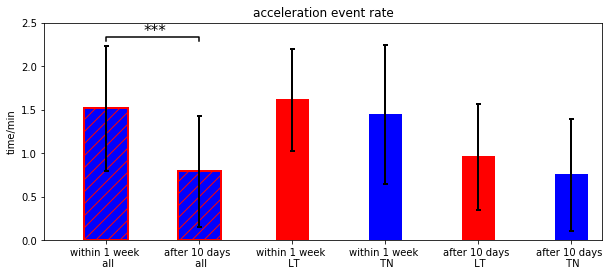

In [4]:
rt_post = np.empty((0,))
rt_pre  = np.empty((0,))

erfdn = np.load('Rats/Rats_ephy_post_TN.npy')
rt_post_TN = np.empty((0,))
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy_post_TN.npy')
    for k in epn:
        fdn = rfdn + k + '/'
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)

        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        n_acc  = len(idx_acc_f)
        rt_post_TN = np.append(rt_post_TN, n_acc/T_ts)
        rt_post = np.append(rt_post, n_acc/T_ts)
erfdn = np.load('Rats/Rats_ephy_post_LT.npy')
rt_post_LT = np.empty((0,))
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy_post_LT.npy')
    for k in epn:
        fdn = rfdn + k + '/'
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)

        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        n_acc  = len(idx_acc_f)
        rt_post_LT = np.append(rt_post_LT, n_acc/T_ts)
        rt_post = np.append(rt_post, n_acc/T_ts)
        
erfdn = np.load('Rats/Rats_ephy_pre_TN.npy')
rt_pre_TN = np.empty((0,))
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy_pre_TN.npy')
    for k in epn:
        fdn = rfdn + k + '/'
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)

        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        n_acc  = len(idx_acc_f)
        rt_pre_TN = np.append(rt_pre_TN, n_acc/T_ts)
        rt_pre = np.append(rt_pre, n_acc/T_ts)
erfdn = np.load('Rats/Rats_ephy_pre_LT.npy')
rt_pre_LT = np.empty((0,))
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy_pre_LT.npy')
    for k in epn:
        fdn = rfdn + k + '/'
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)

        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60
        idx_acc_f = np.load(fdn+'tracking/idx_acc_f.npy');
        n_acc  = len(idx_acc_f)
        rt_pre_LT = np.append(rt_pre_LT, n_acc/T_ts)
        rt_pre = np.append(rt_pre, n_acc/T_ts)
        
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(4); fig.set_figwidth(10)
gs  = GridSpec(1, 1);

rt_post_LT_m = np.mean(rt_post_LT); rt_post_LT_s = np.std(rt_post_LT)
rt_post_TN_m = np.mean(rt_post_TN); rt_post_TN_s = np.std(rt_post_TN)
rt_post_m = np.mean(rt_post); rt_post_s = np.std(rt_post)

rt_pre_LT_m = np.mean(rt_pre_LT);   rt_pre_LT_s = np.std(rt_pre_LT)
rt_pre_TN_m = np.mean(rt_pre_TN);   rt_pre_TN_s = np.std(rt_pre_TN)
rt_pre_m = np.mean(rt_pre);   rt_pre_s = np.std(rt_pre)

xtk = np.array([-1.5, -0.75, 0, 0.75,  1.5, 2.25])

t, p_l  = stats.ttest_ind(rt_post, rt_pre,  equal_var=False)
print(np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
ax.bar(xtk[0],  rt_pre_m,    width = 0.35,  capsize=2, hatch='//',
       lw = 2, facecolor='blue', edgecolor = 'r') 
ax.errorbar(xtk[0], rt_pre_m,  rt_pre_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')
ax.bar(xtk[1], rt_post_m,   width = 0.35, capsize=2,  hatch='//',
       lw = 2, facecolor='blue', edgecolor = 'r')
ax.errorbar(xtk[1], rt_post_m,  rt_post_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')

h_l = rt_pre_m + rt_pre_s;  h_i = rt_post_m + rt_post_s;  h = np.max([h_l,h_i])*1.01

ax.plot([xtk[0], xtk[0], xtk[1], xtk[1]], [h+0.03, h+0.08, h+0.08, h+0.03], 'k', lw=1.5)
ax.text(xtk[0]+0.3, h+0.1,  sign_l, fontsize=15, color = 'k')


ax.bar(xtk[2],  rt_pre_LT_m,    width = 0.25,  capsize=2, lw = 2, color='red', edgecolor = 'red') 
ax.errorbar(xtk[2], rt_pre_LT_m,  rt_pre_LT_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[3],  rt_pre_TN_m,    width = 0.25,  capsize=2, lw = 2, color='blue', edgecolor = 'blue') 
ax.errorbar(xtk[3], rt_pre_TN_m,  rt_pre_TN_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')



ax.bar(xtk[4], rt_post_LT_m,   width = 0.25, capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[4], rt_post_LT_m,  rt_post_LT_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[5],  rt_post_TN_m,    width = 0.25, capsize=2, lw = 2, color='blue', edgecolor = 'blue') 
ax.errorbar(xtk[5], rt_post_TN_m,  rt_post_TN_s,  capsize=2.5,  elinewidth=2, markeredgewidth=2, color = 'k')

xticklabel = ['within 1 week \n all',
              'after 10 days \n all',
              'within 1 week \n LT', 
              'within 1 week \n TN', 
              'after 10 days \n LT',
              'after 10 days \n TN',
             ];
ax.set_title('acceleration event rate')
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk);
ax.set_ylabel('time/min')
ax.set_xlim([-2.0,2.5]);ax.set_ylim([-0.0,2.5])